*K Nearest Neighbors is a classification algorithm

*K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). 

*Firstly we store all the data
*Secondly we calculate the data from x to all points in our data set, x indicationg particular new data point
*Then we sort the points near data by increasing distance from x
*Finally we predict the majority label of K, which is number and represent closest points

*Choosing a K will effect what class a new point is assigned to:
if we choose k=3, then the algorithm looks at the three nearest neighbors to this new point
if we set k=6, then the algorithm looks at the six nearest neighbors to this new point and decide according to the majority of these 6 neighbors.
If we set larger k values,we get a cleaner cutoff at the expense of mislabelling some points


Pros of K Nearest Neighbors:

    1. It is versy simple to implement
    2. It works with any number of classes
    3. It is easy to add new data
    4. It requires fewer parameters as k,which is how many nearest points we want to look at, as distance metric,whatever distance metric we will use, which means how we are defining matematically the distance between our new test point and the old training point

Cons of K Nearest Neighbors:

    1. There is high prediction cost which is worse for large datasets
    2. It is not good for high dimensional data, as our features increase we get higher dimensions for our data, so it will be very difficult to measure distance between various dimensions
    3. Categorical Variables do not work very well with this algorithm

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [18]:
df=pd.read_csv(r"C:\Users\ibrahim\Desktop\datasets\Data Science Jose Potilla\14-K-Nearest-Neighbors\Classified Data",index_col=0)
df.head()
#The columns in the data mean nothing so it is better to use K mearest Neighbors algorithm

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


First of all we have to standartize all of the columns in our data set
because the scale of the observation does matter when we use KNearest Neighbors Algorithm
Any column with large scale will make a larger effect than others

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() #here we create instance of Standart Scaler

In [20]:
scaler.fit(df.drop("TARGET CLASS",axis=1)) 
# here we standartize our features in our dataset apart from the target column

StandardScaler()

In [21]:
#After fitting with our data we will transform our data according to Standart Scaler
scaled_features=scaler.transform(df.drop("TARGET CLASS",axis=1))
scaled_features 
# here we get standartized features of our dataset as numpy arrays

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

The next step is to transform numpy arrays into pandas dataframe

In [22]:
df_features=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_features.head()
# Now all of the features has been standartized and is ready to be put into machine learning algorithm

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [24]:
#We will split our data before training the algorith:
X=df_features
y=df["TARGET CLASS"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train) # the algorithm fits with our data

KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)

Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of a query point will have a
 |        greater influence than neighbors which are further away.
 |      - [callable] : a user-defined function which accepts an
 |        array of distances, and returns an array of the same shape
 |        containing the weights.
 |  
 |  algorithm : {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'
 |      Algorithm used to compute the nearest neighbors:
 |  
 |      - 'ball_tree' will use :class:`BallTree`
 |      - 'kd_tree' will use :class:`KDTree`
 |      - 'brute' will use a brute-force search.
 |      - 'auto' will attempt to decide the most appropriate algorithm
 |        based on the values passed to :meth:`fit` method.

In [27]:
predictions=knn.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0], d

The next step is to evaluate how good our model performs

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))

#TP=151 : true positive
#FN=8   : false negative
#FP=15  :false positive 
#TN=126 : true negative
#The errors are not too high and absorable


[[151   8]
 [ 15 126]]


classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')
    Build a text report showing the main classification metrics
    

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.


In [32]:
print(classification_report(y_test,predictions))

#The precision and accuracy precentages are over %90, it is very good with k=1

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [33]:
#Although k=1 is very good for our predcitions, we will check whether there is better k value or not
error_rate=list()
#here we iterate meny different k values and plot their error rates 
#and discover which one is better than others and has the lowest error rate
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    prediction_i=knn.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test))

Text(0, 0.5, 'Error Rate')

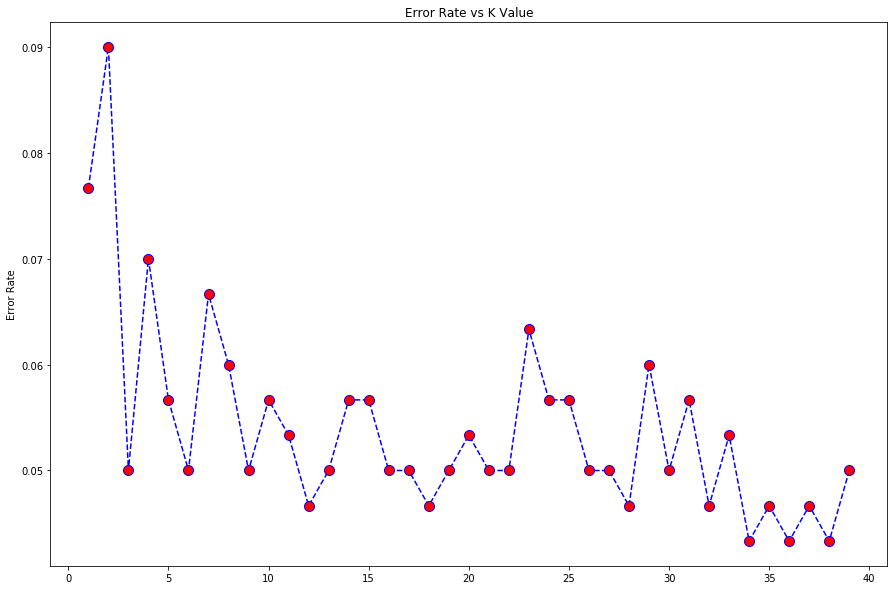

In [34]:
# Now we will plot the prediction error rates of different k values
plt.figure(figsize=(15,10))
plt.plot(range(1,40),error_rate, color="blue", linestyle="--",marker="o",markerfacecolor="red",markersize=10)
plt.title("Error Rate vs K Value")
plt.xlabel="K Value"
plt.ylabel("Error Rate")


According to figure, we start with higher error rates with lower k values
It seems 34 or 36 or 38 as k value give the lowest error rate
Now we will choose one of them and evaluate its performance again

In [35]:
knn=KNeighborsClassifier(n_neighbors=34)
knn.fit(X_train, y_train)
predictions=knn.predict(X_test)
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



[[153   6]
 [  7 134]]


Now, with new k value, the algorithm has % 96 accuracy and the confusion matrix results are also better than before